In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from scipy import stats
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import random
from sklearn.decomposition import PCA

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [114]:
shill = pd.read_csv('Shill Bidding Dataset.csv')

In [115]:
shill

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [116]:
shill.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [117]:
shill.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [118]:
shill.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [119]:
shill.isna().any()

Record_ID                 False
Auction_ID                False
Bidder_ID                 False
Bidder_Tendency           False
Bidding_Ratio             False
Successive_Outbidding     False
Last_Bidding              False
Auction_Bids              False
Starting_Price_Average    False
Early_Bidding             False
Winning_Ratio             False
Auction_Duration          False
Class                     False
dtype: bool

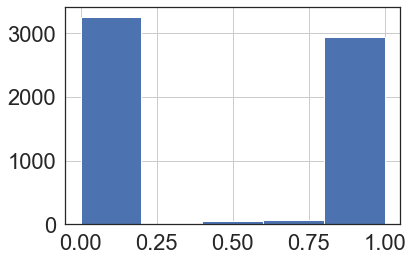

In [120]:
shill['Starting_Price_Average'].hist(bins=5)

In [121]:
shill3 = shill.copy().drop(columns = ['Auction_ID','Bidder_ID','Record_ID'])                                 

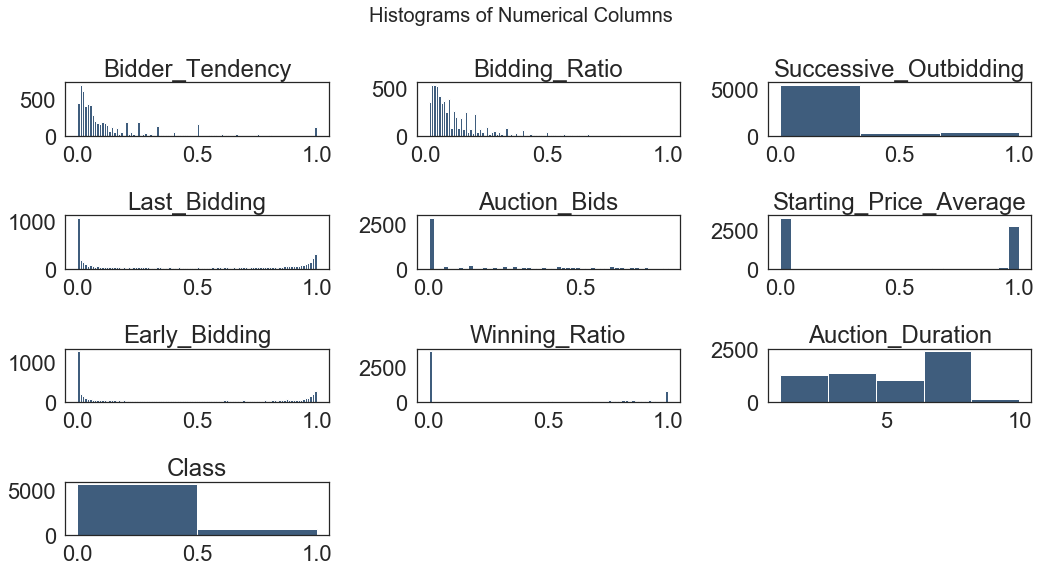

In [122]:
fig = plt.figure(figsize=(15,12))

plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
#Since we want to plot every feature in one single plot, we re going to iterate every feature
for i in range(shill3.shape[1]):
    #This will iterate every feature.Shape gives the dimensions of the dataframe and he first item gives the number of columns
    #and since python does not include all the columns we are adding 1 to it. 
    plt.subplot(6,3,i+1)
    #Here in subplot, we are going to tell python number of images in the plot.'i' is given to tell what we are 
    #working on the moment
    f = plt.gca()
    #gca() command cleans up everything
    f.set_title(shill3.columns.values[i])
    #It will title each feature
    
    vals = np.size(shill3.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    #It will tell python how many bins will be in each feature. [:, i-1 ] will query the entire column
    
    plt.hist(shill3.iloc[:, i], bins = vals, color= '#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


HISTOGRAM

BIDDER TENDENCY: From the histogram we see that most of the people have the value of 0 - 0.2.  Between 0.2 - 0.4, we see the next cluster of Bids. 

Bidding Ratio : The histogram implies that the majority of people are in the Bidding Ratio of 0 - 0.2 which means in most cases, there is no bidding ratio.

Successive Outbidding: There is a high percentage of people in the 0 category and very less people in the in 1 category which implies that most records show that they do not indulge in successive outbidding.

Last Bidding: A Shill Bidder becomes inactive at the last stage. There is not an evidence of Last Bidding but in the end, the data shows a spike in the number of people in last bidding.

Auction Duration : The data shows that the auction duration is mainly between 1 - 6 for most number of biddings and between 6-8, the number of bidding is the highest.

Class: The histogram suggest in most of the bidding cases(6000), the data is 0 which implies the shill bidding did not take place while the answer is 1 for around less than 1000 cases.

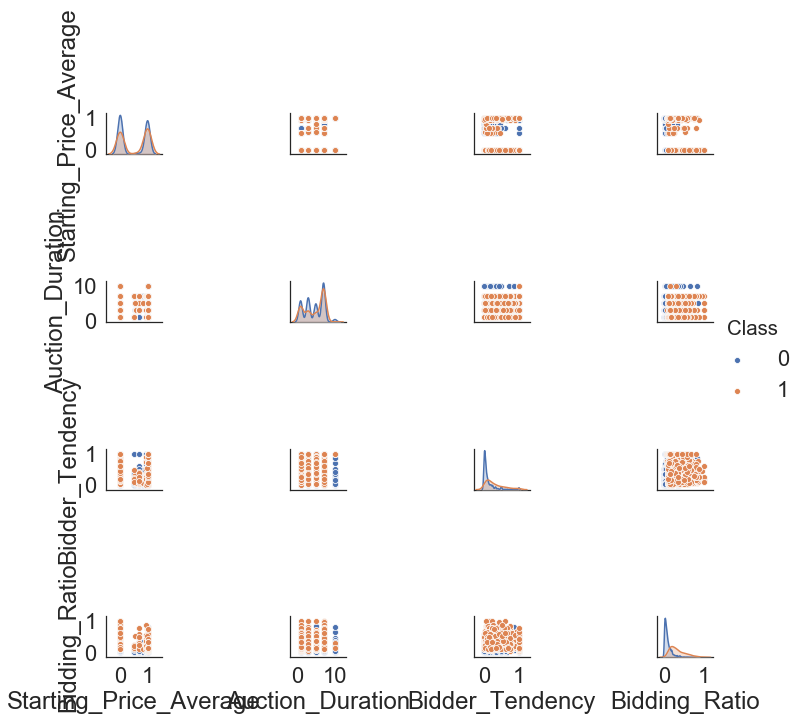

In [123]:
sns.pairplot(shill3, hue='Class',vars = ['Starting_Price_Average','Auction_Duration','Bidder_Tendency','Bidding_Ratio'])

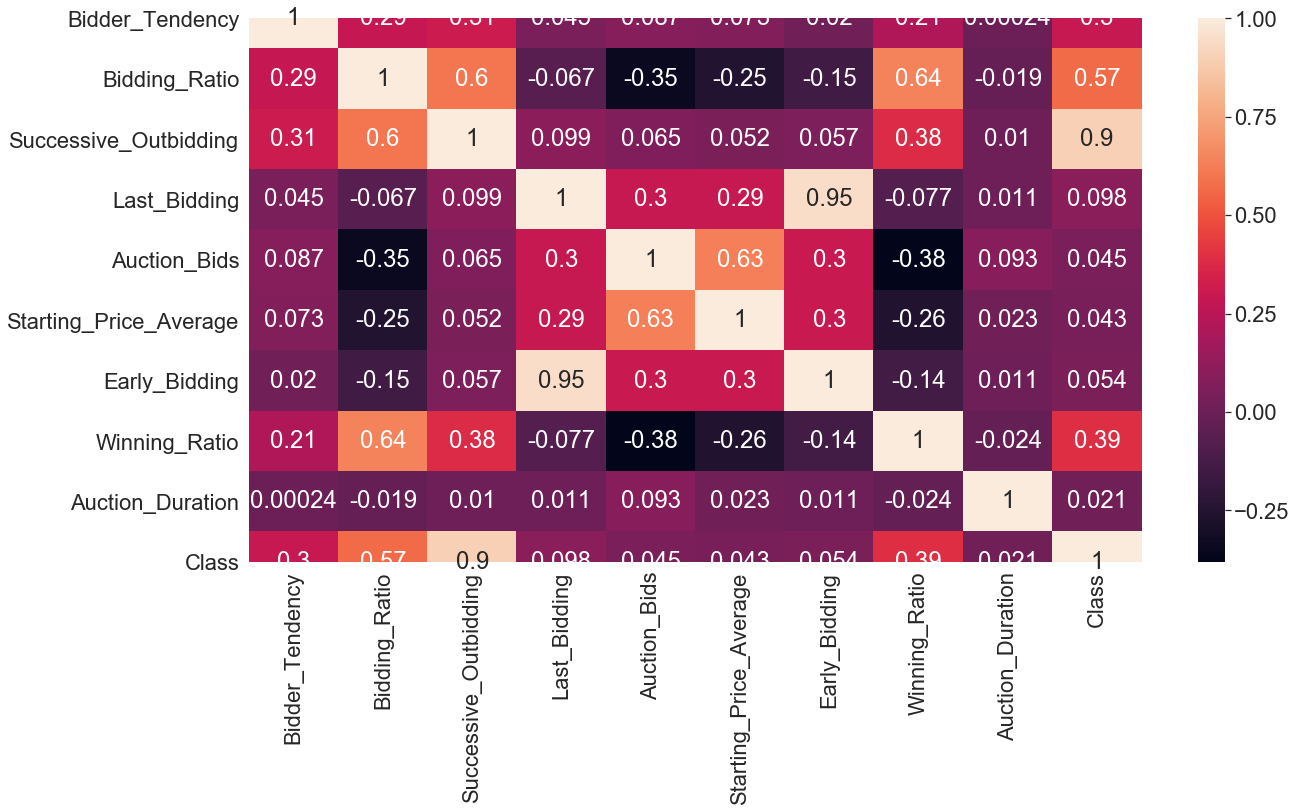

In [124]:
plt.figure(figsize = (20,10))
sns.heatmap(shill3.corr(), annot = True)

HEAT MAP

In the heat map, we see a 0.9 correlation between successive bidding and Class. 

We also see a 0.95 correlation between Early Bidding and Last Bidding.


In [125]:
shill2 = shill.copy().drop(columns = ['Class','Auction_ID','Bidder_ID','Record_ID'])                                 

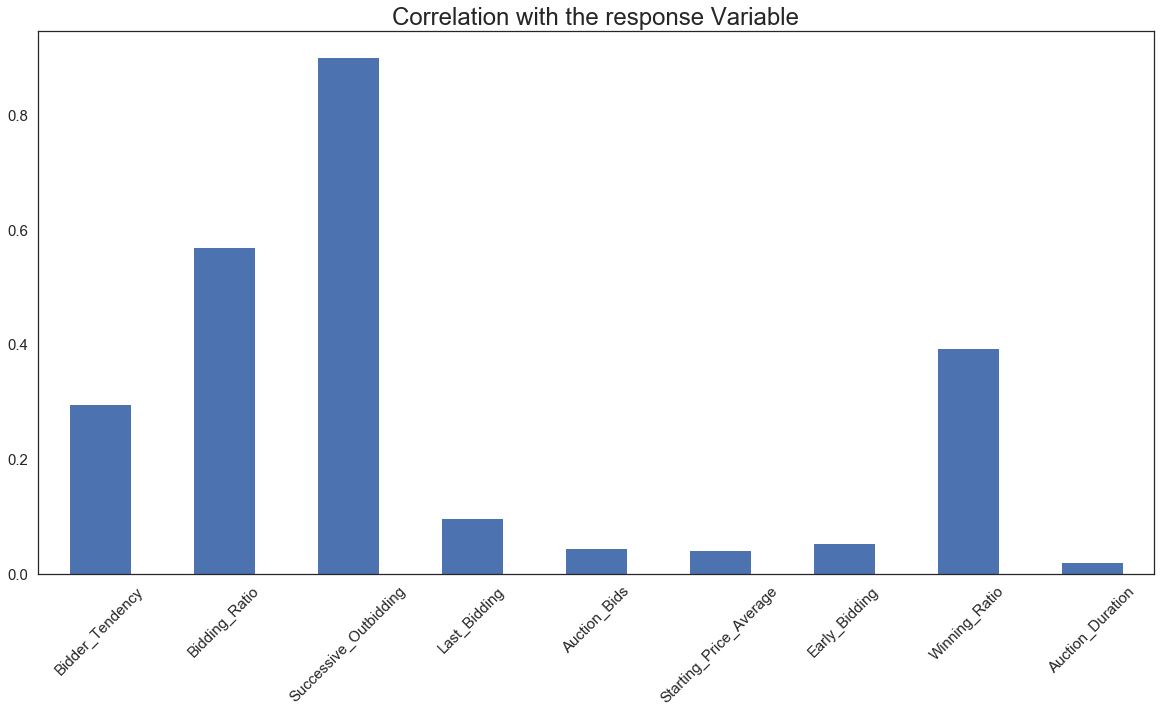

In [126]:
shill2.corrwith(shill.Class).plot.bar(figsize = (20,10),
                                              title = 'Correlation with the response Variable',
                                              fontsize = 15,
                                              rot= 45)

#Cor-relation Plot

Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

The co-relation plot for Successive Outbidding and response variable is highest. It suggests that if there is successive outbidding, then the co-relation of outbidding is the highest.

Bidding Tendency, Bidding Ratio, Winning Ratio also have high correlation which show that if their value is high, so is the probability of the Bidder indulging in Shill Bidding.

The correlation of Last Bidding, Auction Bids, Starting Price Average, Early Bidding and Auction Duration has a very low corelation with the response variable. It suggests that these variables have very less infleunce on the response variable.

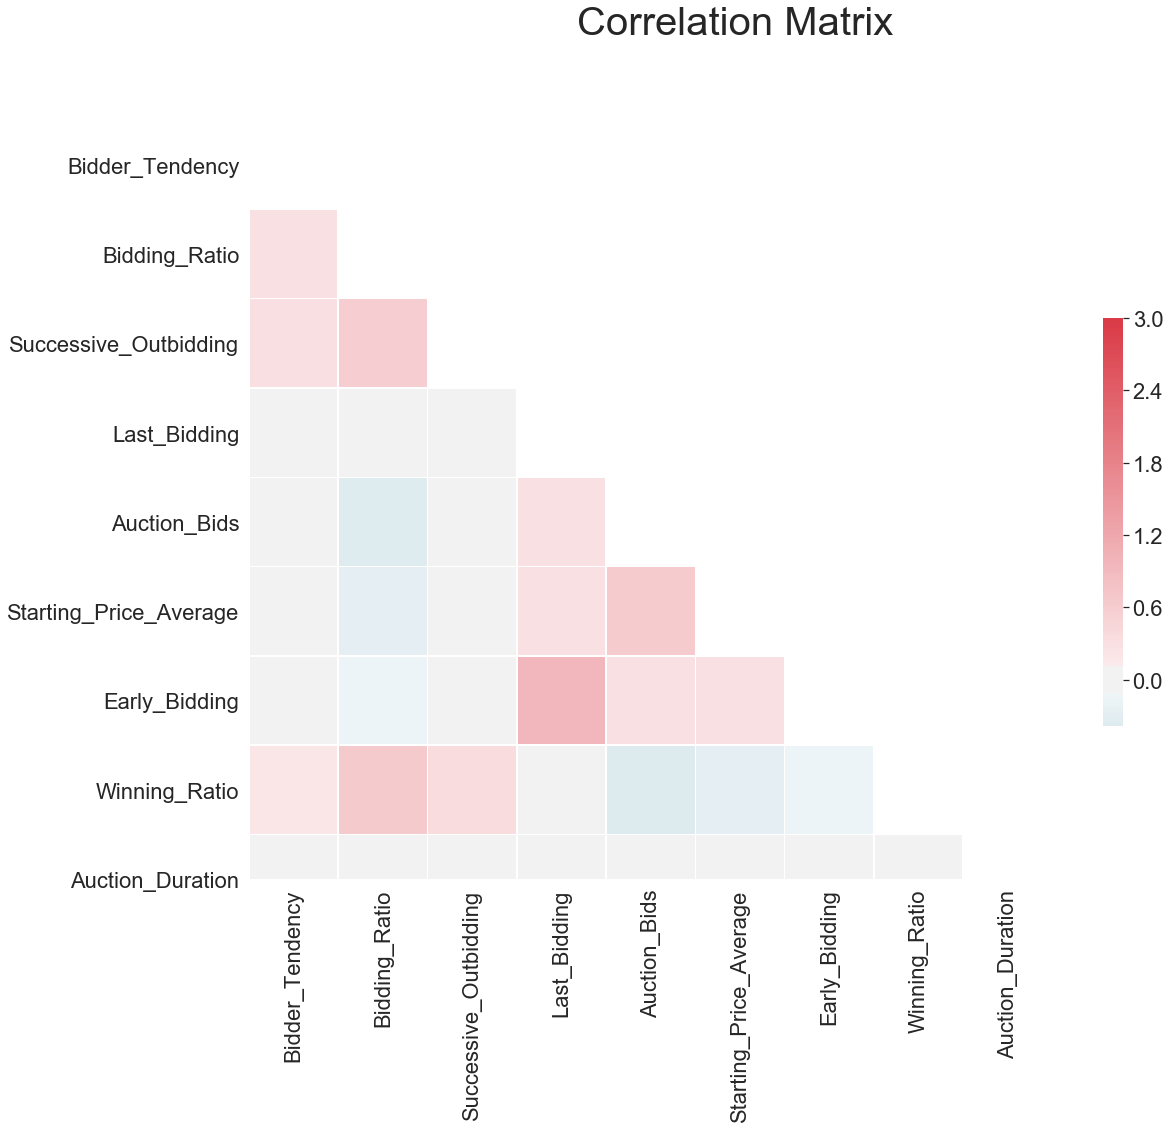

In [127]:
sns.set(style="white", font_scale=2)

corr = shill2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
          square=True, linewidth = .5, cbar_kws={"shrink": .5})

Positive Correlation:
    
Bidder Tendency and Bidding Ratio, Successive Outbidding, Winning Ratio have high correlation. 

Successive Outbidding and Winning ratio have high correlation.

Last Bidding and Starting Price Average, Early Bidding, and Auction Bids have positive correlation.

Negative Correlation:
    
Bidding Ratio and Auction Bids, Starting Price Average, Early Bidding have negative correlation

Auction Bids and Winning Ratio have negative corelation.

Starting Price Average and Winning Ratio have negative correlation

### Data split

In [128]:
shill = shill.sample(frac=1)
train_shill = shill.iloc[:int(0.7*len(shill))]
test_shill = shill.iloc[int(0.7*len(shill)):]
valid_shill = train_shill[int(0.8*len(train_shill)):]
train_shill = train_shill[:int(0.8*len(train_shill))]

In [129]:
data1 = train_shill
data1_x_bin = ['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration']

Target = 'Class'
data1_xy_bin = [Target] + data1_x_bin

### Normalizing data

In [130]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_shill[data1_x_bin])
X_train = pd.DataFrame(x_scaled)
X_train.columns = data1_x_bin
x_scaled = min_max_scaler.transform(valid_shill[data1_x_bin])
X_valid = pd.DataFrame(x_scaled)
X_valid.columns = data1_x_bin
x_scaled = min_max_scaler.transform(test_shill[data1_x_bin])
X_test = pd.DataFrame(x_scaled)
X_test.columns = data1_x_bin

## Principal component Analysis

In [131]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca.explained_variance_ratio_

array([0.39641728, 0.21644372])

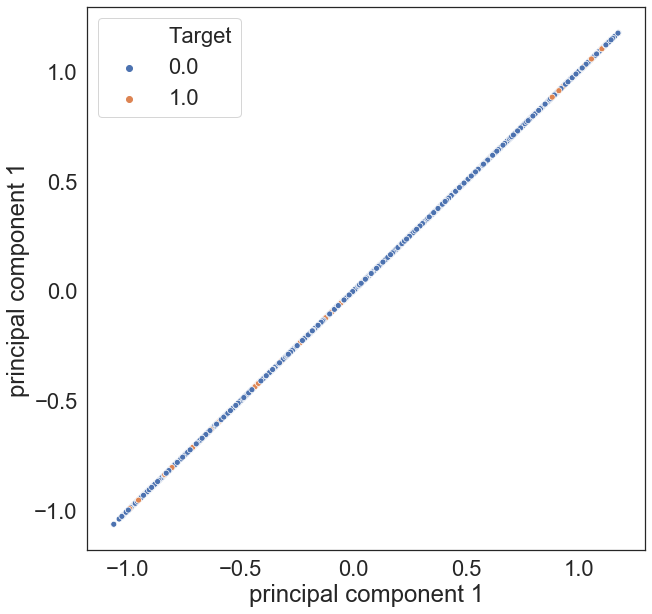

In [132]:
plt.figure(figsize=(10, 10))
principalDf['Target'] = train_shill[Target]
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 1", hue="Target")

#### From the above plot we can see that there is no linear boundary or hyperplane that can be drawn to split the data points and we observe that nearest neighbors dictate the class of a point and also deep learning can find a decision boundary by transforming the input. 


# Logistic Regression

In [133]:
class LogisticRegression:
    def __init__(self,shape, learningRate=0.0001, tolerance=20, maxIteration = 5000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.w = np.ones(shape, dtype=np.float64) * 0

        
    def add_x0(self, X):
        return np.column_stack([np.ones(X.shape[0], 1), X])
    
    def sigmoid(self, z):
        
        sig = 1 / (1 + np.exp(-z))
        
        return sig
    
    def cost_function(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(sig)) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        
        return cost
    
    def gradient(self, X, y):
        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad
    
    def gradient_descent(self,X,y):
        
        cost_sequence = []
        
        last_cost = float('inf')
        tolerance_counter = 0
        #self.w = np.ones(X.shape[1], dtype=np.float64) * 0

        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X,y)
            current_cost = self.cost_function(X, y)
            diff = last_cost - current_cost
            last_cost = current_cost
            cost_sequence.append(current_cost)
            
            if diff < self.tolerance:
                tolerance_counter += 1
                print('The model stopped - no futher improvement')
#                if tolerance_counter == 10:
                break
        self.plot_cost(cost_sequence)
        return
        
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t, s)
        
        ax.set(xlabel='iterations', ylabel='cost', title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc =2, shadow=True)
        plt.show()
    
    def predict(self, X):
        
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, recall, precision
        
    


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:51<00:00, 97.54it/s]
No handles with labels found to put in legend.


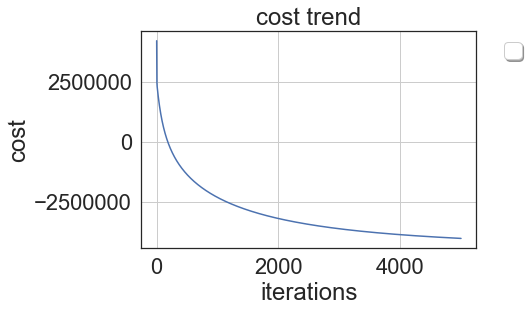

In [134]:
log_reg = LogisticRegression(train_shill[data1_x_bin].shape[1])
log_reg.gradient_descent(train_shill[data1_x_bin], train_shill[Target])

In [135]:
y_hat = log_reg.predict(train_shill[data1_x_bin])
log_train_acc, log_train_rec, log_train_pres = log_reg.evaluate(train_shill[Target], y_hat)
print('Logistic regression accuracy on train data  :  ' + str(log_train_acc))
print('Logistic regression recall on train data  :  ' + str(log_train_rec))
print('Logistic regression precision on train data  :  ' + str(log_train_pres))

Logistic regression accuracy on train data  :  0.9601582367900537
Logistic regression recall on train data  :  0.8071625344352618
Logistic regression precision on train data  :  0.804945054945055


In [136]:
y_hat = log_reg.predict(test_shill[data1_x_bin])
log_test_acc, log_test_rec, log_test_pres = log_reg.evaluate(test_shill[Target], y_hat)
print('Logistic regression accuracy on test data  :  ' + str(log_test_acc))
print('Logistic regression recall on test data  :  ' + str(log_test_rec))
print('Logistic regression precision on test data  :  ' + str(log_test_pres))

Logistic regression accuracy on test data  :  0.9588824459673169
Logistic regression recall on test data  :  0.7644230769230769
Logistic regression precision on test data  :  0.8457446808510638


# K nearest neighbors

In [137]:
def k_nearest_neighbor(X, X_train, Y_train, k):
    [m, n] = X.shape
    [m1, n1] = X_train.shape
    preds = np.zeros((m, 1))
    for i in range(0, m):
        dist = np.subtract(X_train, X[i, :])
        dist = np.linalg.norm(dist, ord=2,  axis=1)
        sort_index = np.argsort(dist)[0:k]
        predictions = Y_train[sort_index]
        preds[i] = stats.mode(predictions).mode[0]
    return preds


def evaluate(y_hat, y):
    y = (y == 1)

    y_hat = (y_hat == 1)

    accuracy = (y == y_hat).sum() / y.size
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()

    return accuracy, recall, precision

k_values = [1, 5, 11, 15, 21]
accuracy_list = []
for j in k_values:
    pred_values = k_nearest_neighbor(np.array(valid_shill[data1_x_bin].values), np.array(train_shill[data1_x_bin].values), np.array(train_shill[Target].values), j)
    accuracy_list.append((j, evaluate(pred_values.astype(int).squeeze(), np.array(valid_shill[Target].values))))

accuracy_list

[(1, (0.9943502824858758, 0.9615384615384616, 0.9900990099009901)),
 (5, (0.9943502824858758, 0.9615384615384616, 0.9900990099009901)),
 (11, (0.992090395480226, 0.9326923076923077, 1.0)),
 (15, (0.9898305084745763, 0.9134615384615384, 1.0)),
 (21, (0.9875706214689266, 0.9038461538461539, 0.9894736842105263))]

In [138]:
test_pred = k_nearest_neighbor(np.array(train_shill[data1_x_bin].values), np.array(train_shill[data1_x_bin].values), np.array(train_shill[Target].values), 5)
knn_train_acc, knn_train_recall, knn_train_prec = evaluate(test_pred.astype(int).squeeze(), np.array(train_shill[Target].values))
print('KNN accuracy on train data  :  ' + str(knn_train_acc))
print('KNN recall on train data  :  ' + str(knn_train_recall))
print('KNN precision on train data  :  ' + str(knn_train_prec))

KNN accuracy on train data  :  0.9971743430347556
KNN recall on train data  :  0.977961432506887
KNN precision on train data  :  0.9943977591036415


In [139]:
test_pred = k_nearest_neighbor(np.array(test_shill[data1_x_bin].values), np.array(train_shill[data1_x_bin].values), np.array(train_shill[Target].values), 5)
knn_test_acc, knn_test_recall, knn_test_prec = evaluate(test_pred.astype(int).squeeze(), np.array(test_shill[Target].values))
print('KNN accuracy on test data  :  ' + str(knn_test_acc))
print('KNN recall on test data  :  ' + str(knn_test_recall))
print('KNN precision on test data  :  ' + str(knn_test_prec))

KNN accuracy on test data  :  0.9989457037427517
KNN recall on test data  :  1.0
KNN precision on test data  :  0.9904761904761905


# Deep Neural Network

In [140]:
model = keras.models.Sequential()
model.add(layers.Dense(11,activation='relu',input_dim=9))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [141]:
model.fit(train_shill[data1_x_bin],train_shill[Target],epochs=300)

Epoch 1/300
3539/3539 [==============================] - 1s 143us/sample - loss: 0.4376 - acc: 0.8525
Epoch 2/300
3539/3539 [==============================] - ETA: 0s - loss: 0.2711 - acc: 0.910 - 0s 90us/sample - loss: 0.2677 - acc: 0.9127
Epoch 3/300
3539/3539 [==============================] - 0s 88us/sample - loss: 0.1340 - acc: 0.9607
Epoch 4/300
3539/3539 [==============================] - 0s 86us/sample - loss: 0.0884 - acc: 0.9607
Epoch 5/300
3539/3539 [==============================] - 0s 88us/sample - loss: 0.0714 - acc: 0.9675
Epoch 6/300
3539/3539 [==============================] - 0s 90us/sample - loss: 0.0633 - acc: 0.9726
Epoch 7/300
3539/3539 [==============================] - 0s 90us/sample - loss: 0.0563 - acc: 0.9763
Epoch 8/300
3539/3539 [==============================] - 0s 87us/sample - loss: 0.0502 - acc: 0.9788
Epoch 9/300
3539/3539 [==============================] - 0s 86us/sample - loss: 0.0470 - acc: 0.9825
Epoch 10/300
3539/3539 [============================

3539/3539 [==============================] - 0s 89us/sample - loss: 0.0100 - acc: 0.9977
Epoch 82/300
3539/3539 [==============================] - 0s 85us/sample - loss: 0.0100 - acc: 0.9966
Epoch 83/300
3539/3539 [==============================] - 0s 85us/sample - loss: 0.0099 - acc: 0.9972
Epoch 84/300
3539/3539 [==============================] - 0s 85us/sample - loss: 0.0097 - acc: 0.9969
Epoch 85/300
3539/3539 [==============================] - 0s 89us/sample - loss: 0.0096 - acc: 0.9972
Epoch 86/300
3539/3539 [==============================] - 0s 84us/sample - loss: 0.0098 - acc: 0.9969
Epoch 87/300
3539/3539 [==============================] - 0s 87us/sample - loss: 0.0098 - acc: 0.9977
Epoch 88/300
3539/3539 [==============================] - 0s 84us/sample - loss: 0.0093 - acc: 0.9966
Epoch 89/300
3539/3539 [==============================] - 0s 79us/sample - loss: 0.0088 - acc: 0.9975
Epoch 90/300
3539/3539 [==============================] - 0s 86us/sample - loss: 0.0092 - acc: 

3539/3539 [==============================] - 0s 88us/sample - loss: 0.0048 - acc: 0.9983
Epoch 161/300
3539/3539 [==============================] - 0s 84us/sample - loss: 0.0047 - acc: 0.9977
Epoch 162/300
3539/3539 [==============================] - 0s 86us/sample - loss: 0.0042 - acc: 0.9986
Epoch 163/300
3539/3539 [==============================] - 0s 87us/sample - loss: 0.0037 - acc: 0.9989
Epoch 164/300
3539/3539 [==============================] - 0s 89us/sample - loss: 0.0031 - acc: 0.9986
Epoch 165/300
3539/3539 [==============================] - 0s 86us/sample - loss: 0.0031 - acc: 0.9994
Epoch 166/300
3539/3539 [==============================] - 0s 84us/sample - loss: 0.0031 - acc: 0.9992
Epoch 167/300
3539/3539 [==============================] - 0s 87us/sample - loss: 0.0034 - acc: 0.9983
Epoch 168/300
3539/3539 [==============================] - ETA: 0s - loss: 0.0034 - acc: 0.998 - 0s 82us/sample - loss: 0.0034 - acc: 0.9989
Epoch 169/300
3539/3539 [========================

3539/3539 [==============================] - 0s 88us/sample - loss: 0.0018 - acc: 0.9997
Epoch 239/300
3539/3539 [==============================] - 0s 80us/sample - loss: 0.0018 - acc: 0.9994
Epoch 240/300
3539/3539 [==============================] - 0s 83us/sample - loss: 0.0021 - acc: 0.9989
Epoch 241/300
3539/3539 [==============================] - 0s 88us/sample - loss: 0.0022 - acc: 0.9989TA: 0s - loss: 2.7225e-04 - acc: 1
Epoch 242/300
3539/3539 [==============================] - ETA: 0s - loss: 0.0018 - acc: 0.9997 - 0s 83us/sample - loss: 0.0017 - acc: 0.9997
Epoch 243/300
3539/3539 [==============================] - 0s 86us/sample - loss: 0.0018 - acc: 0.9994
Epoch 244/300
3539/3539 [==============================] - 0s 80us/sample - loss: 0.0017 - acc: 0.9994
Epoch 245/300
3539/3539 [==============================] - 0s 114us/sample - loss: 0.0019 - acc: 0.9992
Epoch 246/300
3539/3539 [==============================] - 0s 94us/sample - loss: 0.0017 - acc: 0.9997
Epoch 247/300

In [142]:
Y_pred_nn = model.predict(train_shill[data1_x_bin])
Y_pred_nn[Y_pred_nn >= 0.5] = 1
Y_pred_nn[Y_pred_nn < 0.5] = 0
dnn_train_acc, dnn_train_recall, dnn_train_prec = evaluate(Y_pred_nn.astype(int).squeeze(), np.array(train_shill[Target].values))
print('DNN accuracy on train data  :  ' + str(dnn_train_acc))
print('DNN recall on train data  :  ' + str(dnn_train_recall))
print('DNN precision on train data  :  ' + str(dnn_train_prec))

DNN accuracy on train data  :  0.9997174343034756
DNN recall on train data  :  1.0
DNN precision on train data  :  0.9972527472527473


In [143]:
Y_pred_nn = model.predict(test_shill[data1_x_bin])
Y_pred_nn[Y_pred_nn >= 0.5] = 1
Y_pred_nn[Y_pred_nn < 0.5] = 0
dnn_test_acc, dnn_test_recall, dnn_test_prec = evaluate(Y_pred_nn.astype(int).squeeze(), np.array(test_shill[Target].values))
print('DNN accuracy on test data  :  ' + str(dnn_test_acc))
print('DNN recall on test data  :  ' + str(dnn_test_recall))
print('DNN precision on test data  :  ' + str(dnn_test_prec))

DNN accuracy on test data  :  0.9978914074855034
DNN recall on test data  :  0.9903846153846154
DNN precision on test data  :  0.9903846153846154
